## Importation des modules nécessaires à l'élaboration du projet

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Examinons la donnée

In [2]:
attrition_data = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_train.csv')
attrition_test = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_test.csv')

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,No,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,...,4,80,0,17,2,3,15,7,4,12
1,52,No,Travel_Frequently,322,Research & Development,28,2,Medical,1,1401,...,2,80,1,24,3,2,5,3,0,2
2,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,...,1,80,3,10,6,3,9,8,7,5
3,43,No,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,...,2,80,1,25,2,3,8,7,0,7
4,27,No,Non-Travel,443,Research & Development,3,3,Medical,1,850,...,3,80,3,0,6,2,0,0,0,0


In [4]:
attrition_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,index1
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,1
2,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,2
3,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,80,0,8,2,2,7,7,3,6,3
4,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,...,80,1,10,1,3,10,9,8,8,4


In [5]:
attrition_test = attrition_test.drop('index1', axis=1)

In [6]:
attrition_data.shape

(1100, 35)

In [7]:
# attrition_data.columns

In [8]:
# attrition_test.columns

In [9]:
attrition_test.shape

(370, 34)

In [10]:
attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,...,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000,1100.000
mean,36.855,804.235,9.302,2.907,1.000,1026.405,2.731,66.012,2.707,2.065,...,2.697,80.000,0.785,11.206,2.781,2.781,7.070,4.250,2.186,4.199
std,9.039,405.583,8.093,1.012,0.000,598.713,1.084,20.374,0.731,1.116,...,1.084,0.000,0.849,7.785,1.309,0.706,6.147,3.595,3.235,3.585
min,18.000,102.000,1.000,1.000,1.000,4.000,1.000,30.000,1.000,1.000,...,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,460.500,2.000,2.000,1.000,494.750,2.000,48.000,2.000,1.000,...,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,805.000,7.000,3.000,1.000,1031.000,3.000,66.000,3.000,2.000,...,3.000,80.000,1.000,9.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,42.250,1162.000,14.000,4.000,1.000,1543.250,4.000,84.000,3.000,3.000,...,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1498.000,29.000,5.000,1.000,2065.000,4.000,100.000,4.000,5.000,...,4.000,80.000,3.000,38.000,6.000,4.000,37.000,18.000,15.000,17.000


In [12]:
# attrition_data.isna().sum()

0 valeur manquante donc RAS

In [13]:
attrition_data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

## Création de notre modèle

### Encodage de nos variables catégorielles

In [14]:
attrition_data.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Medical,Female,Manufacturing Director,Married,Y,Yes
2,No,Non-Travel,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
4,No,Non-Travel,Research & Development,Medical,Male,Research Scientist,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1095,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Single,Y,No
1096,No,Travel_Rarely,Human Resources,Life Sciences,Female,Human Resources,Married,Y,No
1097,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,Yes
1098,No,Non-Travel,Research & Development,Technical Degree,Male,Manufacturing Director,Married,Y,No


In [15]:
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(attrition_data[var], prefix=var)
    data1=attrition_data.join(cat_list)
    attrition_data=data1

cat_vars2 = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for var in cat_vars2:
    cat_list2='var'+'_'+var
    cat_list2 = pd.get_dummies(attrition_test[var], prefix=var)
    data2=attrition_test.join(cat_list2)
    attrition_test=data2

In [16]:
attrition_data_numbers = attrition_data.drop(cat_vars, axis=1)

In [17]:
attrition_test_numbers = attrition_test.drop(cat_vars2, axis=1)

In [18]:
# attrition_test_numbers.head()

In [19]:
# attrition_data.dtypes

### Mise en place de notre modèle de régression logistique

In [20]:
attrition_data['Attrition'] = attrition_data['Attrition'].replace(['Yes', 'No'], [1, 0])

In [21]:
attrition_data['Attrition']

0       0
1       0
2       0
3       0
4       0
       ..
1095    0
1096    0
1097    0
1098    0
1099    1
Name: Attrition, Length: 1100, dtype: int64

In [22]:
y = attrition_data['Attrition']
X = attrition_data_numbers.drop('Attrition', axis=1)
X_pred = attrition_test_numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    0
1096    0
1097    0
1098    0
1099    1
Name: Attrition, Length: 1100, dtype: int64

In [23]:
X_pred.shape

(370, 55)

In [24]:
X.shape

(1100, 55)

In [25]:
my_model = LogisticRegressionCV(cv=5, random_state=1,solver='liblinear')

In [26]:
my_model.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=1, solver='liblinear')

In [27]:
prediction = my_model.predict(X_test)

In [28]:
score = my_model.score(X_test, y_test)
print('Test Accuracy Score :', score)

Test Accuracy Score : 0.8545454545454545


In [29]:
print('F-mesure :', f1_score(y_test,prediction, average="macro"))

F-mesure : 0.6822531142805561


In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[175,   9],
       [ 23,  13]])

Text(0.5, 257.44, 'Predicted label')

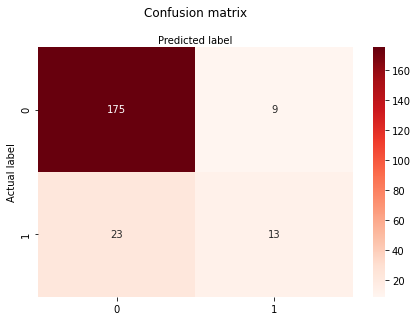

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Prédictions à partir de notre jeu de données test

In [32]:
my_model.fit(X,y)

LogisticRegressionCV(cv=5, random_state=1, solver='liblinear')

In [33]:
prediction2 = my_model.predict(X_pred)

In [34]:
my_model.predict_proba(X_test)[:,1]

array([2.07528229e-02, 2.15945253e-01, 4.10187275e-02, 1.62089457e-01,
       5.93847894e-02, 2.12198802e-02, 9.47589347e-02, 6.17406962e-02,
       2.62328923e-02, 1.31662433e-01, 8.57912234e-02, 1.36873941e-01,
       6.24415442e-01, 2.68559427e-02, 3.13477490e-01, 2.42524207e-02,
       3.63874539e-02, 1.63141776e-01, 7.21287480e-02, 4.35301048e-02,
       1.29765477e-01, 1.69716121e-01, 2.09404046e-01, 2.71088586e-01,
       6.69851710e-02, 7.49304038e-02, 1.68137523e-01, 3.68683195e-01,
       3.34544396e-01, 7.71262854e-03, 2.77823746e-02, 1.07895784e-02,
       7.76975355e-02, 2.77401376e-02, 1.40839342e-02, 2.04805772e-01,
       6.83690068e-04, 2.51783340e-02, 1.09788716e-01, 8.10741880e-01,
       1.09489272e-01, 6.09904158e-01, 1.20554396e-02, 3.12117129e-01,
       5.32397060e-02, 1.57049856e-01, 1.52911758e-01, 2.62794118e-01,
       3.12779631e-02, 4.33844461e-02, 2.30047041e-01, 9.82370603e-02,
       2.13979558e-01, 2.91131880e-02, 2.04766861e-01, 5.20542217e-02,
      

In [35]:
print(prediction2)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
employees = attrition_test['EmployeeNumber']

In [37]:
# employees.head()

In [38]:
employees2 = pd.DataFrame(data = prediction2, columns = ['Predictions'])

In [39]:
# employees2.head()

In [40]:
employees = pd.DataFrame(data = attrition_test['EmployeeNumber'], columns = ['EmployeeNumber'])

In [41]:
# employees.head()

In [42]:
employees['Predictions'] = employees2

In [43]:
# employees.head()

In [44]:
employees.shape

(370, 2)

In [45]:
employees.Predictions.value_counts()

0    351
1     19
Name: Predictions, dtype: int64